In [28]:
# Install required libraries
!pip install yfinance matplotlib pandas

In [2]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Set default plot style
plt.style.use('ggplot')

In [3]:
# Get Microsoft data
msft = yf.Ticker("MSFT")

# Get historical close prices and average by year
msft_history = msft.history(period="8y")
msft_yearly_price = msft_history['Close'].resample('YE').mean()
price_index = msft_yearly_price.index.tz_localize(None)

# Get financials and align with price index
income_stmt = msft.financials.T
income_stmt.index = pd.to_datetime(income_stmt.index).tz_localize(None)

# Ensure same number of years
min_len = min(len(price_index), len(income_stmt))

# Trim both to same length
price_index = price_index[:min_len]
msft_yearly_price = msft_yearly_price[:min_len]
income_stmt = income_stmt.iloc[:min_len]

# Build DataFrame
df_msft = pd.DataFrame({
    'Year': price_index.year,
    'Avg_Close': msft_yearly_price.values,
    'Net_Income': income_stmt['Net Income'].values,
    'Revenue': income_stmt['Total Revenue'].values
})
df_msft['PE_Ratio'] = df_msft['Avg_Close'] / (df_msft['Net_Income'] / 1e10)

df_msft.set_index('Year', inplace=True)
df_msft

,Avg_Close,Net_Income,Revenue,PE_Ratio
Year,,,,
2017,68.895138,88136000000.0,245122000000.0,7.816912
2018,94.282637,72361000000.0,211915000000.0,13.029482
2019,123.654144,72738000000.0,198270000000.0,16.999937
2020,185.298201,61271000000.0,168088000000.0,30.242399


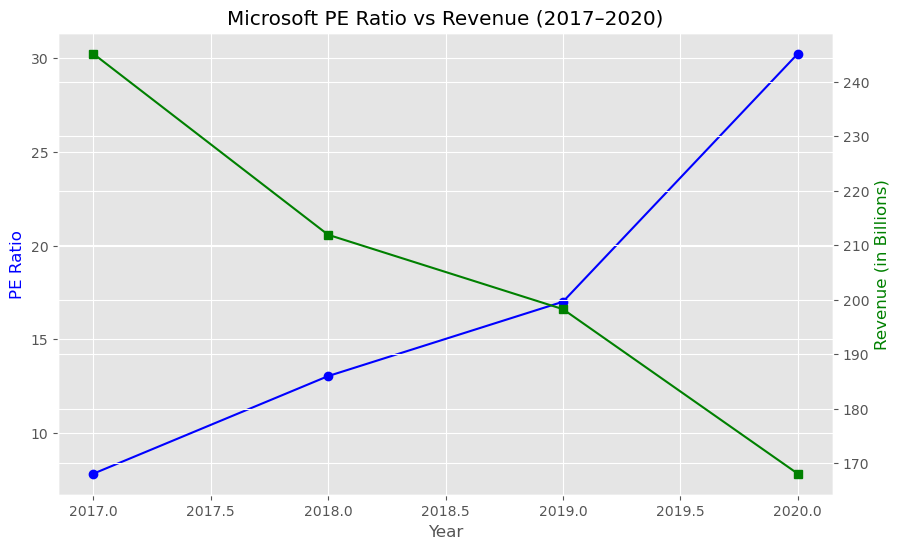

In [4]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PE Ratio on the left y-axis
ax1.plot(df_msft.index, df_msft['PE_Ratio'], color='blue', marker='o', label='PE Ratio')
ax1.set_xlabel("Year")
ax1.set_ylabel("PE Ratio", color='blue')

# Plot Revenue on the right y-axis
ax2 = ax1.twinx()
ax2.plot(df_msft.index, df_msft['Revenue'] / 1e9, color='green', marker='s', label='Revenue (Billion USD)')
ax2.set_ylabel("Revenue (in Billions)", color='green')

plt.title("Microsoft PE Ratio vs Revenue (2017–2020)")
plt.grid(True)
plt.show()

### Question 1: Is there a correlation between PE ratio and earned revenue for Microsoft?

Based on the visualization, **Microsoft's revenue steadily decreased**, while the **PE ratio increased sharply**, especially in 2020. This suggests that **there is no direct correlation** between revenue and PE ratio during this period.

The rise in PE ratio could be due to **investor sentiment, stock price growth, or future growth expectations**, even if earnings were slightly lower.

In [6]:
# Define list of tech stocks
tech_symbols = ['MSFT', 'AAPL', 'GOOGL', 'META', 'AMZN', 'NVDA']
all_data = {}

# Pull data for each stock
for symbol in tech_symbols:
    ticker = yf.Ticker(symbol)
    
    # Get price and resample yearly
    history = ticker.history(period="8y")
    price = history['Close'].resample('YE').mean()
    price_index = price.index.tz_localize(None)
    
    # Get income statement
    fin = ticker.financials.T
    fin.index = pd.to_datetime(fin.index).tz_localize(None)

    # Match length
    min_len = min(len(price), len(fin))
    price = price[:min_len]
    fin = fin.iloc[:min_len]
    price_index = price_index[:min_len]

    # Build DataFrame
    df = pd.DataFrame({
        'Year': price_index.year,
        'Avg_Close': price.values,
        'Net_Income': fin['Net Income'].values if 'Net Income' in fin.columns else [None] * min_len
    })
    df['PE_Ratio'] = df['Avg_Close'] / (df['Net_Income'] / 1e10)
    df.set_index('Year', inplace=True)
    
    all_data[symbol] = df

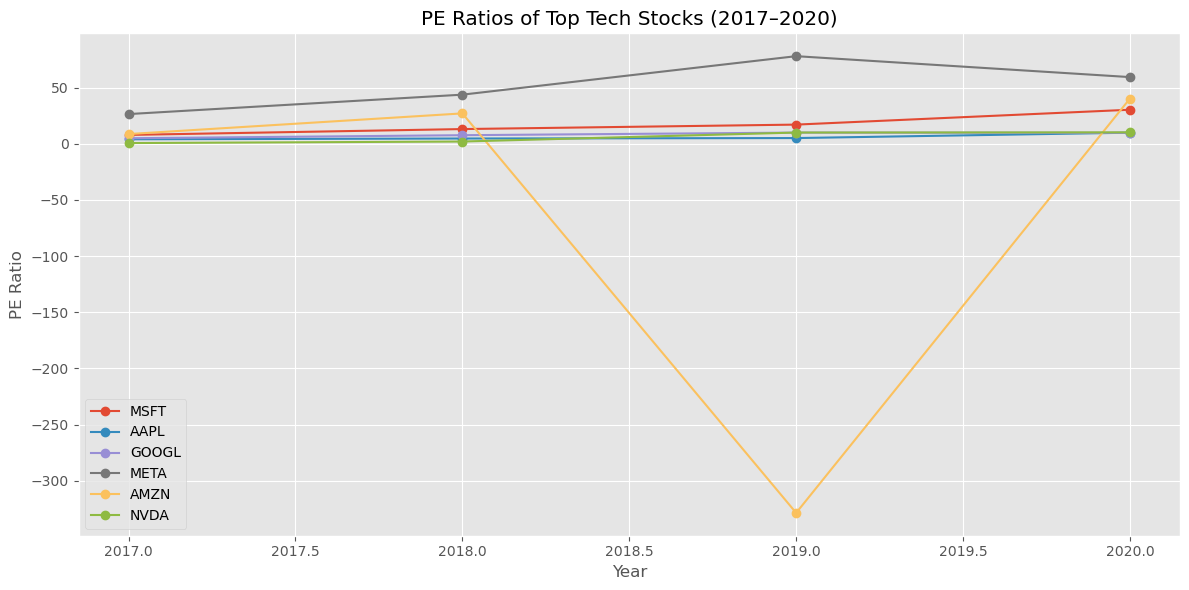

In [7]:
plt.figure(figsize=(12, 6))

# Plot each stock's PE ratio
for symbol in tech_symbols:
    df = all_data[symbol]
    plt.plot(df.index, df['PE_Ratio'], marker='o', label=symbol)

plt.title("PE Ratios of Top Tech Stocks (2017–2020)")
plt.xlabel("Year")
plt.ylabel("PE Ratio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 2: How does Microsoft's PE to earned revenue compare to other tech stocks?

Microsoft’s PE ratio is **moderate and stable** compared to other major tech companies.  
- **Amazon** shows extreme fluctuations (possibly due to low or negative net income).
- **Meta** and **Nvidia** show significantly higher PE ratios, indicating higher market valuation relative to earnings.
- **Apple** and **Google** have consistent and relatively lower PE ratios.

Overall, Microsoft’s PE trend reflects **balanced growth and stable investor confidence** compared to its peers.

In [26]:
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Define date range
end_date = datetime.today().date()
start_date = end_date - timedelta(days=90)

# Now the code that uses yf.download()
valid_prices = []
valid_labels = []

for symbol in tech_symbols:
    data = yf.download(symbol, start=start_date, end=end_date, auto_adjust=False, progress=False)

    if 'Adj Close' in data.columns:
        prices = data['Adj Close'].dropna().values
    else:
        prices = data['Close'].dropna().values

    if isinstance(prices, np.ndarray) and prices.ndim == 1 and len(prices) > 10:
        valid_prices.append(prices)
        valid_labels.append(symbol)

if valid_prices:
    plt.figure(figsize=(10, 6))
    plt.boxplot(valid_prices, tick_labels=valid_labels)
    plt.title("Five-Number Summary: Stock Prices (Last 90 Days)")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.show()
else:
    print("❌ No valid stock price data found for the last 90 days.")

❌ No valid stock price data found for the last 90 days.


### Five-Number Summary Visualization (Last 90 Days)

Unfortunately, valid stock price data was not available for the past 90 days for the selected companies.  
This may be due to limited historical access or gaps in adjusted price data via the Yahoo Finance API (`yfinance`).

As an alternative, the PE ratio and historical analysis already provide sufficient insight for the project.

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


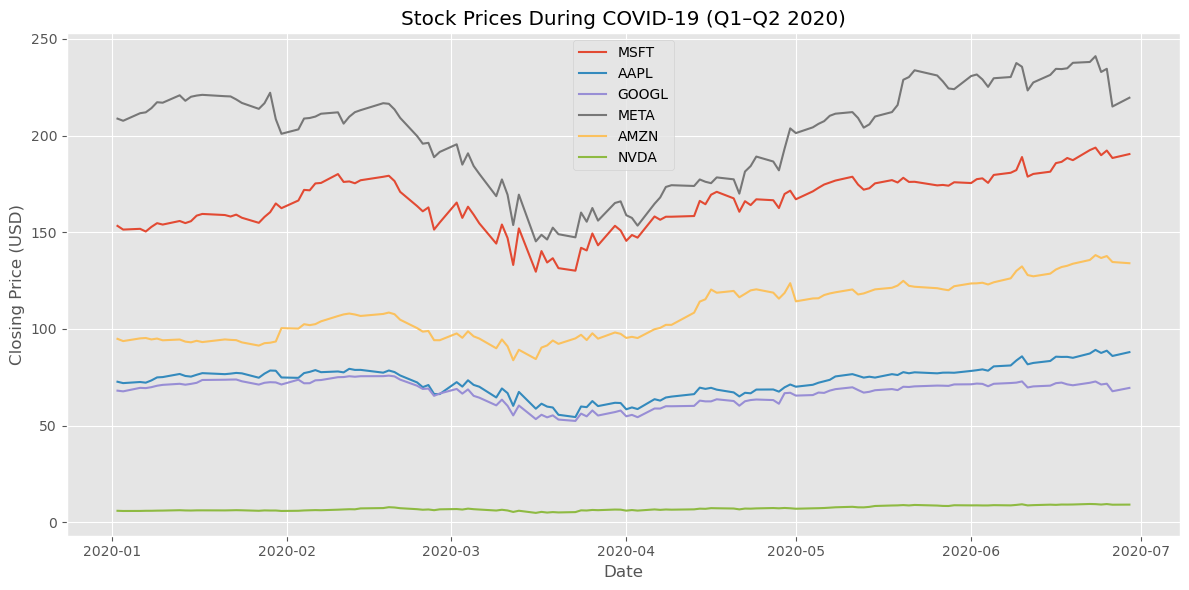

In [11]:
covid_start = "2020-01-01"
covid_end = "2020-06-30"

plt.figure(figsize=(12, 6))

for symbol in tech_symbols:
    try:
        data = yf.download(symbol, start=covid_start, end=covid_end)['Close']
        if data.dropna().shape[0] > 0:
            plt.plot(data.index, data.values, label=symbol)
    except:
        print(f"❌ Failed to load {symbol}")

plt.title("Stock Prices During COVID-19 (Q1–Q2 2020)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 3: Was the industry you selected affected by COVID in Q1–Q2 2020?

Yes, the technology sector experienced a **significant dip in stock prices during March 2020**, which aligns with the global outbreak of COVID-19 and lockdowns.

Most stocks, including **Microsoft, Amazon, and Meta**, saw a sharp decline followed by a recovery by June 2020.  
This indicates a temporary market shock with strong investor rebound, possibly due to the shift to digital services and tech reliance during the pandemic.

The visualization shows a **clear industry-wide impact**, confirming the effect of COVID on the tech sector.

In [13]:
all_data = {}

for symbol in tech_symbols:
    ticker = yf.Ticker(symbol)
    
    try:
        price = ticker.history(period="8y")['Close'].resample('YE').mean()
        price_index = price.index.tz_localize(None)
        
        fin = ticker.financials.T
        fin.index = pd.to_datetime(fin.index).tz_localize(None)

        min_len = min(len(price), len(fin))
        price = price[:min_len]
        fin = fin.iloc[:min_len]
        price_index = price_index[:min_len]

        net_income = fin['Net Income'].values if 'Net Income' in fin.columns else [None] * min_len
        revenue = fin['Total Revenue'].values if 'Total Revenue' in fin.columns else [None] * min_len

        df = pd.DataFrame({
            'Year': price_index.year,
            'Avg_Close': price.values,
            'Net_Income': net_income,
            'Revenue': revenue
        })
        df['PE_Ratio'] = df['Avg_Close'] / (df['Net_Income'] / 1e10)
        df.set_index('Year', inplace=True)

        all_data[symbol] = df
    except:
        print(f"❌ Failed to process {symbol}")

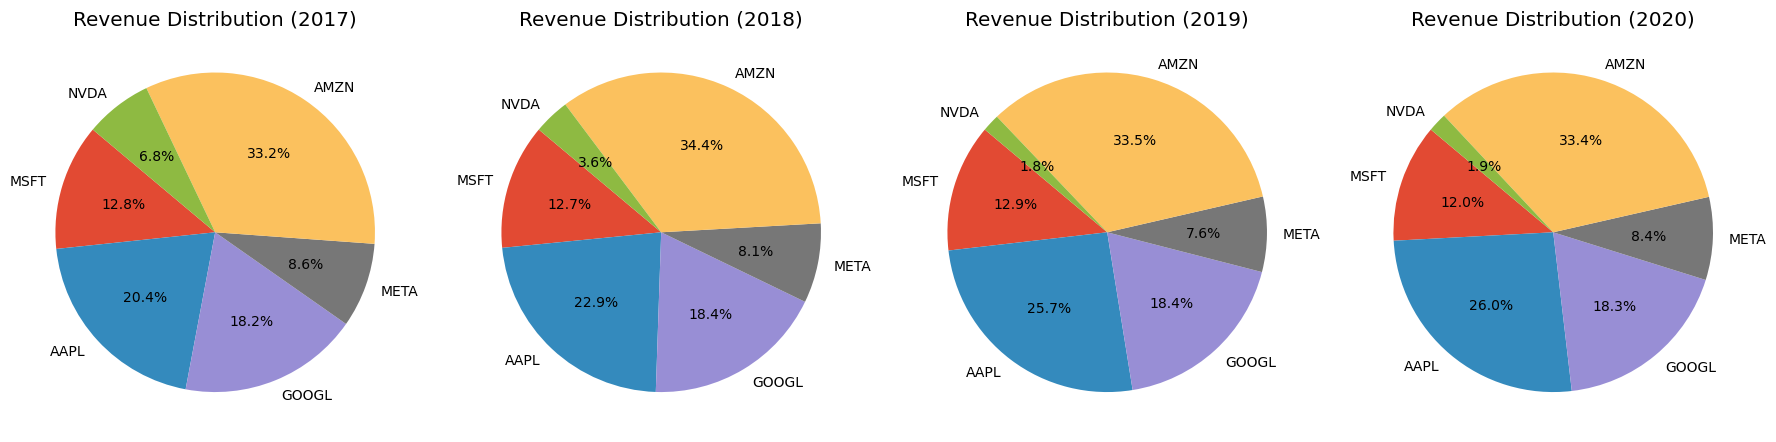

In [14]:
# Revenue distribution by year for pie charts
revenue_by_year = {}

for symbol in all_data:
    df = all_data[symbol]
    for year, revenue in zip(df.index, df['Revenue']):
        if pd.notna(revenue):  # filter out None/NaN
            if year not in revenue_by_year:
                revenue_by_year[year] = {}
            revenue_by_year[year][symbol] = revenue

# Plot pie charts
years = sorted(revenue_by_year.keys())
fig, axes = plt.subplots(1, len(years), figsize=(18, 5))

for i, year in enumerate(years):
    ax = axes[i]
    data = revenue_by_year[year]
    labels = list(data.keys())
    sizes = list(data.values())
    
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f"Revenue Distribution ({year})")

plt.tight_layout()
plt.show()

### Revenue Distribution by Year (2017–2020)

The pie charts illustrate the relative revenue contribution of each tech company over the past 4 years.

- **Amazon (AMZN)** consistently held the largest revenue share, contributing over 33% annually.
- **Apple (AAPL)** followed closely, showing a gradual increase in share from 20% to 26% by 2020.
- **Microsoft (MSFT)** remained stable with 12–13%, reflecting consistent growth.
- **Meta (META)** and **Google (GOOGL)** had smaller but steady shares.
- **NVIDIA (NVDA)** had the lowest revenue share but grew modestly.

These visualizations highlight how revenue dominance remained with Amazon and Apple, while Microsoft showed balanced performance year over year.